In [36]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [51]:
state_labs = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

def fetch_data_kw(kw):
    dir = '/media/johnattan/LaCie/Twitter_Terms/' + kw + '/GEO-Tweets.csv'
    df = pd.read_csv(dir, index_col=None, header=0)
    df = df.drop(labels = ['Unnamed: 0', 'Unnamed: 0.1', 'id'], axis = 1)

    return df

def fetch_data_cts(date):
    dir = '/media/johnattan/LaCie/Twitter_Terms/State_Counts/2020-6.csv'
    df = pd.read_csv(dir, index_col=None, header=0)
    
    return df

def collapse_count(df):
    states = []
    counts = []
    for state in df.State.unique():
        states.append(state)
        counts.append(np.sum(df[df.State == state].Counts))
    
    collapsed_cts = pd.DataFrame([])
    collapsed_cts['State'] = states
    collapsed_cts['Count'] = counts
    
    return collapsed_cts

def subset_date(df, date):
    time_vec = df.created_at.values
    inds = [x[0:7] == date for x in df.created_at.values]   
    
    return df[inds]

def count_by_state(df):
    counts = df.state.value_counts()
    
    # Fill zero states
    zero_states = list(set(state_labs) - set(list(counts.index.values)))
    
    for state in zero_states:
        counts = counts.append(pd.Series([0], index=[state]))
    
    return counts

def plot_choropleth(kw_counts, total_counts, locations, kw='', date=''):
    
    ####
    #print(kw_counts)
    #print(total_counts)
    
    fig = go.Figure(data=go.Choropleth(
        locations=locations, # Spatial coordinates
        z = kw_counts / total_counts, # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'Reds',
        colorbar_title = "Tweet Counts / Tweet Volume",
        #range_color = [0.005, 0.02],
        zmin=0.00, zmax=0.001,
    ))

    if kw == '':
        fig.update_layout(
            title_text = 'Tweets related to Covid-19',
            geo_scope='usa', # limite map scope to USA
        )
    else:
        fig.update_layout(
            title_text = 'Tweets related to Covid-19 and ' + kw + ' ' + date,
            geo_scope='usa', # limite map scope to USA
        )
    fig.show()
    fig.write_image('figures/' + kw + '/' + kw + '-' + date + '.png')


def compare_plots(kw, date):
    
    df_kw = fetch_data_kw(kw)
    df_kw = subset_date(df_kw, date)
    kw_cts = count_by_state(df_kw)
    
    df_cts = collapse_count(fetch_data_cts(date))
    kw_cts = kw_cts.sort_index()
    
    ########
    kw_counts = kw_cts.values
    total_counts = df_cts['Count']
    locations = kw_cts.index.values
    
    fig = make_subplots(rows=1, cols=1, column_widths=[0.7])
    
    fig.add_trace(
        go.Figure(data=go.Choropleth(
            locations=locations, # Spatial coordinates
            z = kw_counts / total_counts, # Data to be color-coded
            locationmode = 'USA-states', # set of locations match entries in `locations`
            colorscale = 'Reds',
            colorbar_title = "Tweet Counts / Tweet Volume",))
            #zmin=0.00, zmax=0.001,))
    , row=1, col=1)
    
#     fig.add_trace(
#         go.Figure(data=go.Choropleth(
#             locations=locations, # Spatial coordinates
#             z = kw_counts / total_counts, # Data to be color-coded
#             locationmode = 'USA-states', # set of locations match entries in `locations`
#             colorscale = 'Reds',
#             colorbar_title = "Tweet Counts / Tweet Volume",
#             #range_color = [0.005, 0.02],
#             zmin=0.00, zmax=0.001,))
#     , row=1, col=2)
    
    fig.show()
    #plot_choropleth(kw_cts.values, df_cts['Count'], kw_cts.index.values, kw=kw, date=date)
    #plot_choropleth(kw_cts.values, df_cts['Count'], kw_cts.index.values, kw=kw, date=date)

    

In [52]:
compare_plots('WINE', '2020-06')

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [Figure({
    'data': [{'colorbar': {'title': {'text': 'Tweet Counts / Tweet Volume'}},
              'colorscale': [[0.0, 'rgb(255,245,240)'], [0.125,
                             'rgb(254,224,210)'], [0.25, 'rgb(252,187,161)'],
                             [0.375, 'rgb(252,146,114)'], [0.5, 'rgb(251,106,74)'],
                             [0.625, 'rgb(239,59,44)'], [0.75, 'rgb(203,24,29)'],
                             [0.875, 'rgb(165,15,21)'], [1.0, 'rgb(103,0,13)']],
              'locationmode': 'USA-states',
              'locations': [AK, AL, AR, AZ, CA, CO, CT, DC, DE, FL, GA, HI, IA,
                            ID, IL, IN, KS, KY, LA, MA, MD, ME, MI, MN, MO, MS, MT,
                            NC, ND, NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, RI, SC,
                            SD, TN, TX, UT, VA, VT, WA, WI, WV, WY],
              'type': 'choropleth',
              'z': array([7.51565762e-04, 6.52917003e-04, 6.90199172e-04, 6.24926107e-04,
                          1.23287301e-03, 8.51240360e-04, 9.12272752e-04, 1.48609756e-05,
                          2.22274216e-03, 9.18498895e-04, 7.04494787e-04, 7.58374708e-04,
                          6.30119723e-04, 6.44061375e-04, 8.49955402e-04, 9.35201201e-04,
                          1.03430952e-03, 1.60216322e-03, 6.44282723e-04, 7.36733900e-04,
                          6.60441290e-04, 1.18361224e-03, 8.52651325e-04, 8.00437108e-04,
                          6.73895481e-04, 3.89120199e-04, 7.53224743e-04, 7.77625342e-04,
                          9.47717580e-04, 5.34262781e-04, 9.41334142e-04, 8.82888832e-04,
                          1.07908424e-03, 7.47292165e-04, 7.78080399e-04, 1.53083846e-02,
                          6.84587650e-04, 8.73099335e-04, 7.82330002e-04, 9.17852226e-04,
                          7.46688437e-04, 9.16790361e-04, 7.66984096e-04, 5.71815562e-04,
                          8.29332866e-04, 7.86073508e-04, 1.24974495e-03, 1.10359761e-03,
                          7.23689063e-04, 1.70803123e-03, 1.26219719e-03])}],
    'layout': {'template': '...'}
})]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scatterternary', 'splom',
                     'streamtube', 'sunburst', 'surface', 'table',
                     'treemap', 'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

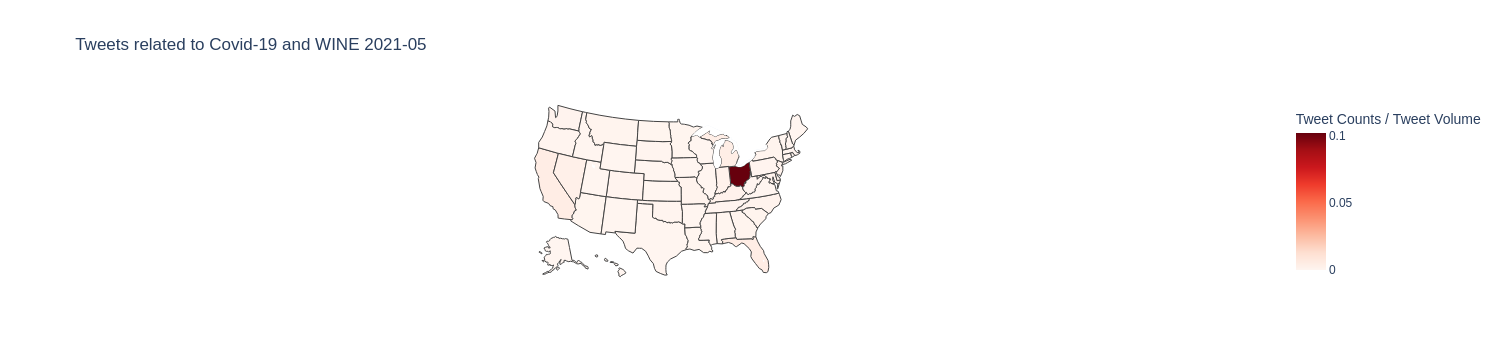

In [24]:
compare_plots('WINE', '2021-05')

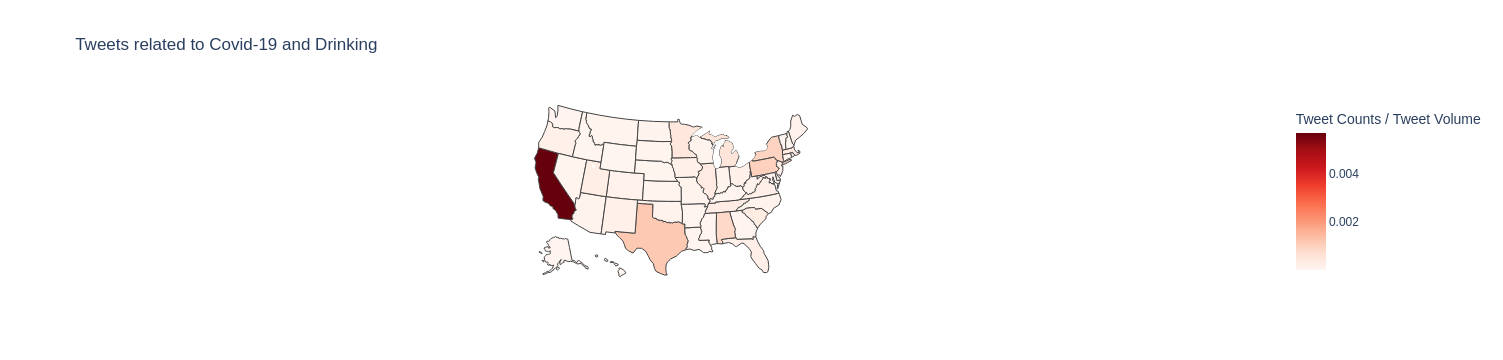

In [39]:
compare_plots('Drinking', '2021-05')

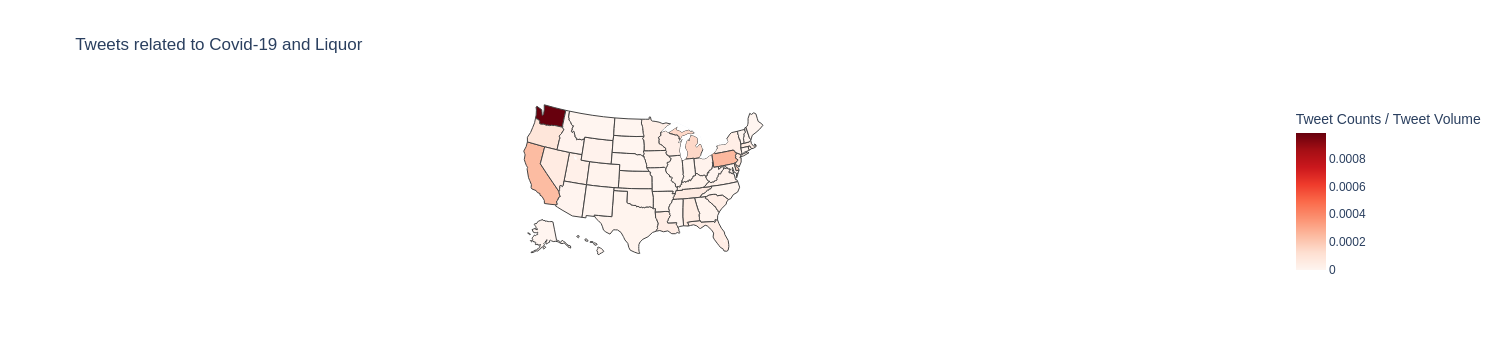

In [43]:
compare_plots('Liquor', '2021-05')

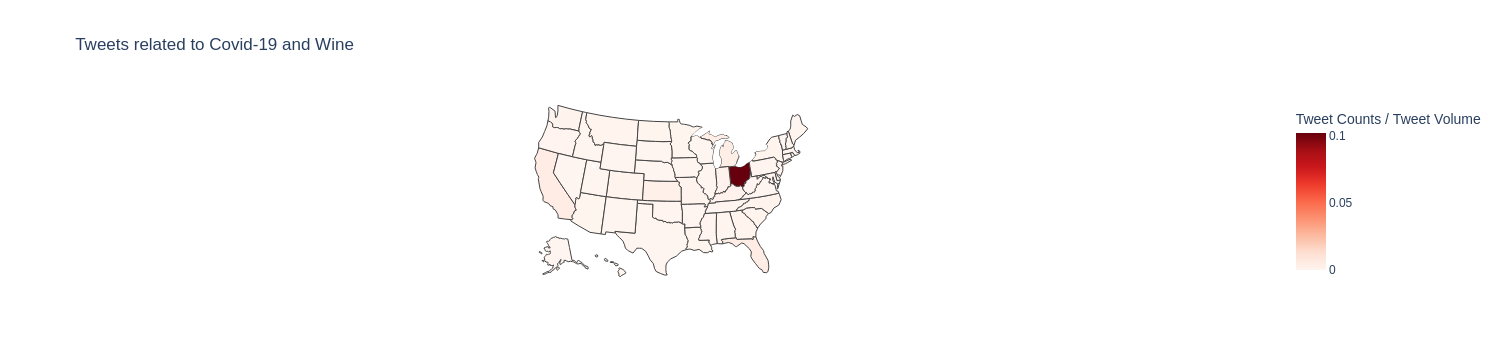

In [48]:
compare_plots('Wine', '2021-05')

In [20]:
# Alcohol, Beer, Drinking, Liquor, Wine
kw = 'BEER'
date = '2020-06'

df_kw = fetch_data_kw(kw)
df_kw = subset_date(df_kw, date)
kw_cts = count_by_state(df_kw)
    
df_cts = collapse_count(fetch_data_cts(date))
#plot_choropleth(kw_cts.values, df_cts['Count'], kw_cts.index.values, kw=kw, date=date)


CA    1512
TX    1305
FL    1039
NY     934
WA     577
IL     453
OH     443
PA     391
NJ     348
MA     327
TN     294
GA     289
NC     285
VA     283
CO     273
OR     271
MI     269
AZ     256
MN     213
WI     183
MD     170
IN     162
NV     132
KS     121
CT     117
KY     116
LA     113
SC     113
MO     109
ME      92
AL      83
OK      82
NM      79
IA      73
AR      60
UT      54
DE      47
ID      45
AK      42
RI      41
NH      40
MT      37
HI      35
NE      34
MS      31
VT      29
WV      24
WY      14
ND       9
SD       9
DC       6
Name: state, dtype: int64

In [25]:

fig = px.choropleth(df_kw, geojson=states, locations='state', color=kw_cts,
                           color_continuous_scale="Viridis",
                           range_color=(0.005, 0.2),
                           scope="usa",
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

NameError: name 'states' is not defined